In [ ]:
#summary of the dataset. ​​

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/datasetbhat.csv'
df = pd.read_csv(file_path)

# Show the first few rows of the dataset to get an idea of its structure
df.head()


,rownames,Anger,Gender,item,resp,id,btype,situ,mode,r2
0,1,20,M,S1WantCurse,no,1,curse,other,want,N
1,2,11,M,S1WantCurse,no,2,curse,other,want,N
2,3,17,F,S1WantCurse,perhaps,3,curse,other,want,Y
3,4,21,F,S1WantCurse,perhaps,4,curse,other,want,Y
4,5,17,F,S1WantCurse,perhaps,5,curse,other,want,Y


In [ ]:
#basic univariate analysis

# Get dimensions of the dataset
data_dimensions = df.shape

# Get summary statistics for numerical columns
summary_stats = df.describe()

# Check for missing values
missing_values = df.isnull().sum()

# Data types of the columns
data_types = df.dtypes

data_dimensions, summary_stats, missing_values, data_types


((7584, 10),
           rownames        Anger         id
 count  7584.000000  7584.000000  7584.0000
 mean   3792.500000    20.003165   158.5000
 std    2189.456554     4.841139    91.2269
 min       1.000000    11.000000     1.0000
 25%    1896.750000    17.000000    79.7500
 50%    3792.500000    19.000000   158.5000
 75%    5688.250000    23.000000   237.2500
 max    7584.000000    39.000000   316.0000,
 rownames    0
 Anger       0
 Gender      0
 item        0
 resp        0
 id          0
 btype       0
 situ        0
 mode        0
 r2          0
 dtype: int64,
 rownames     int64
 Anger        int64
 Gender      object
 item        object
 resp        object
 id           int64
 btype       object
 situ        object
 mode        object
 r2          object
 dtype: object)

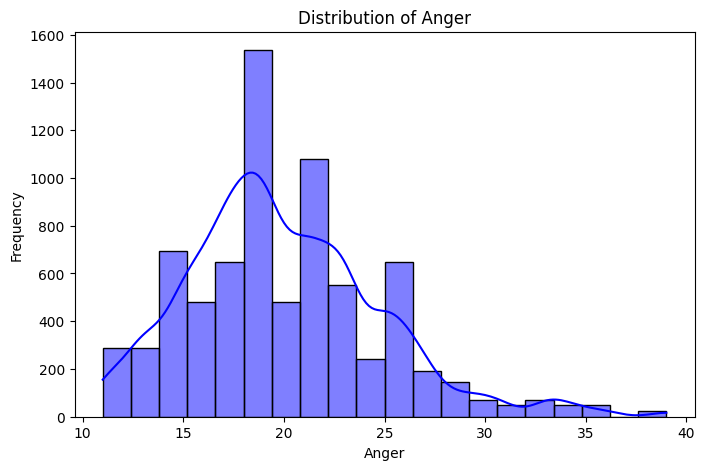

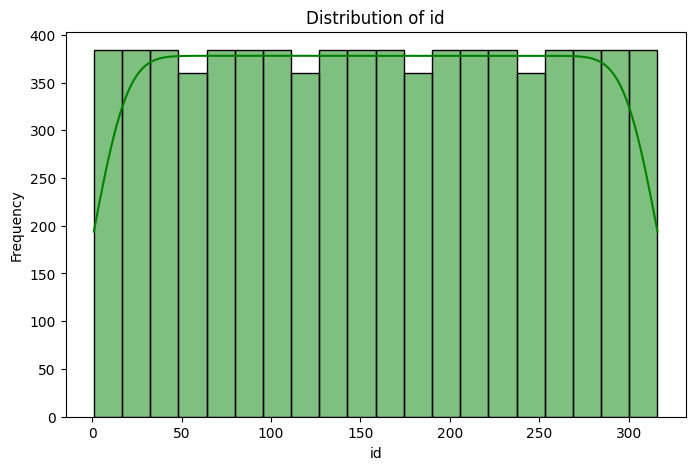

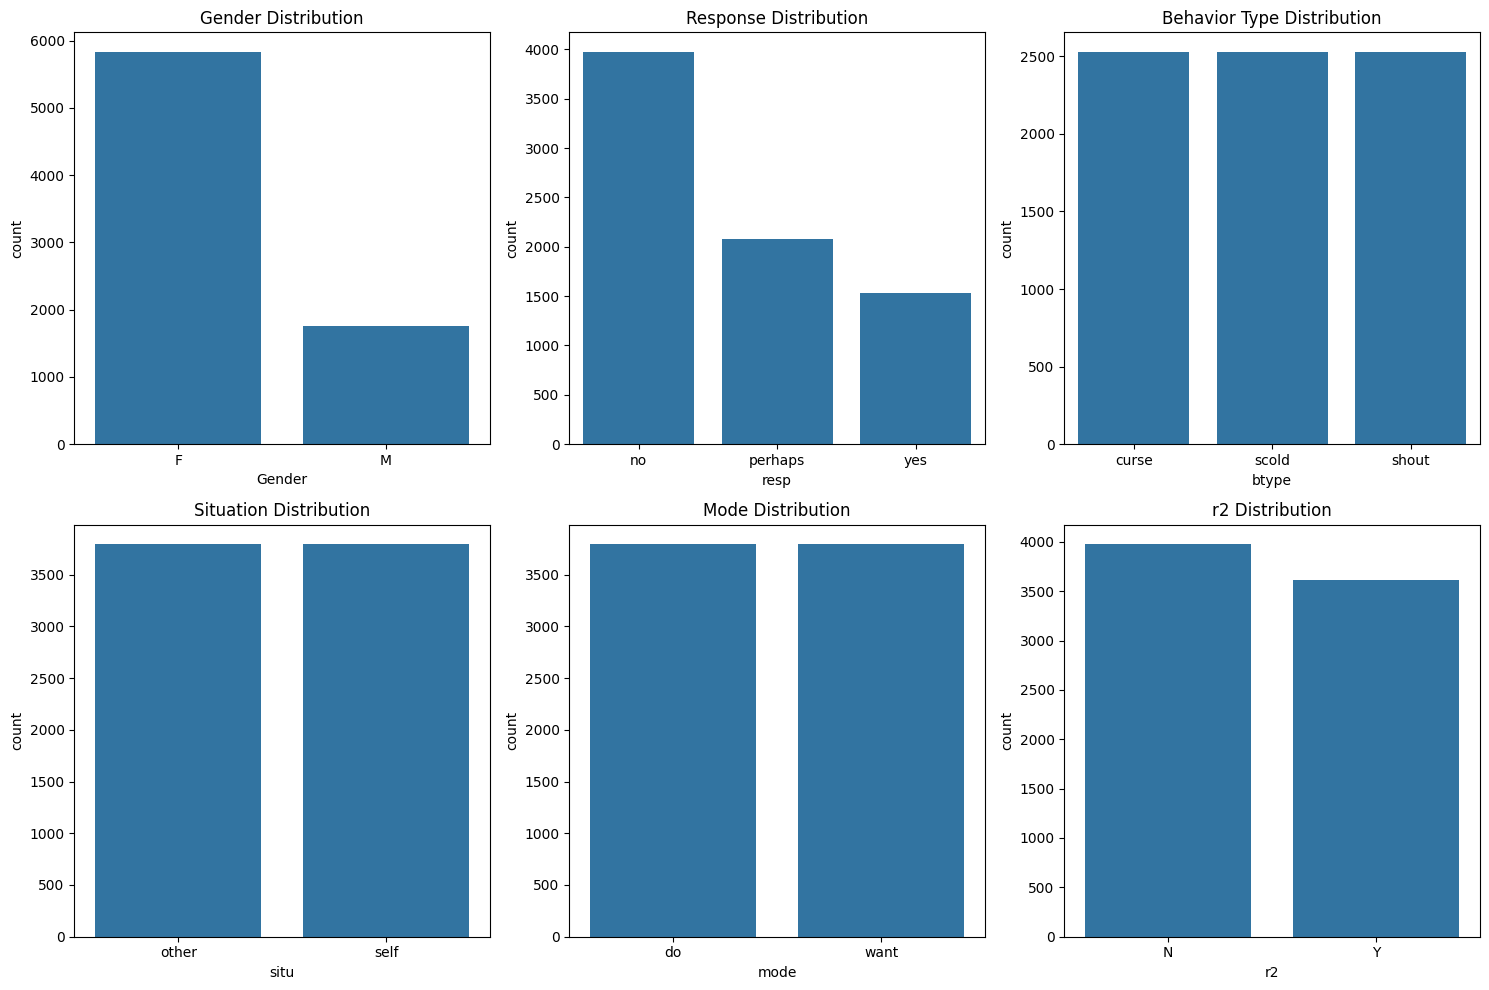

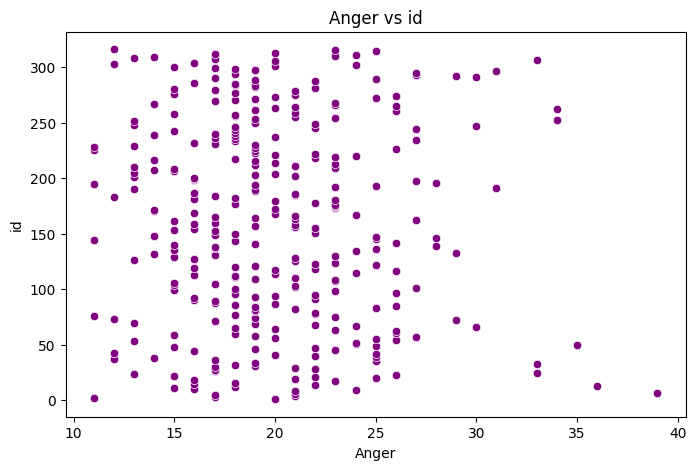

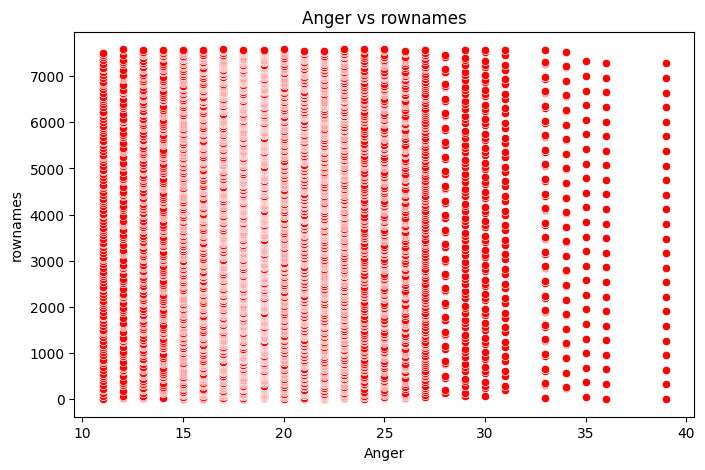

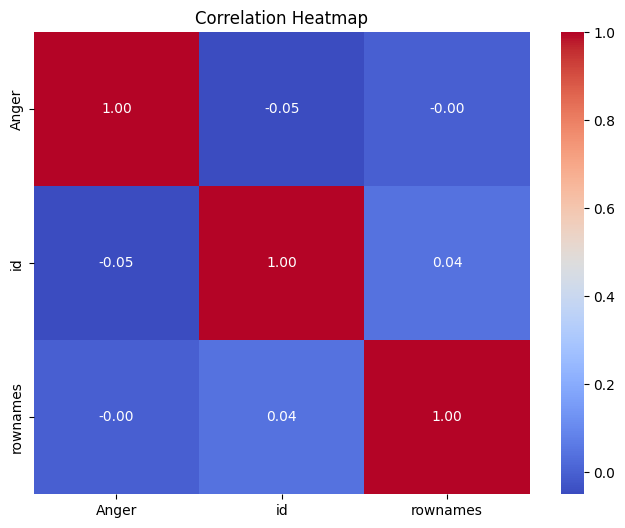

<ipython-input-5-1351e9a2ca64>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Anger', data=df, palette='Set2')


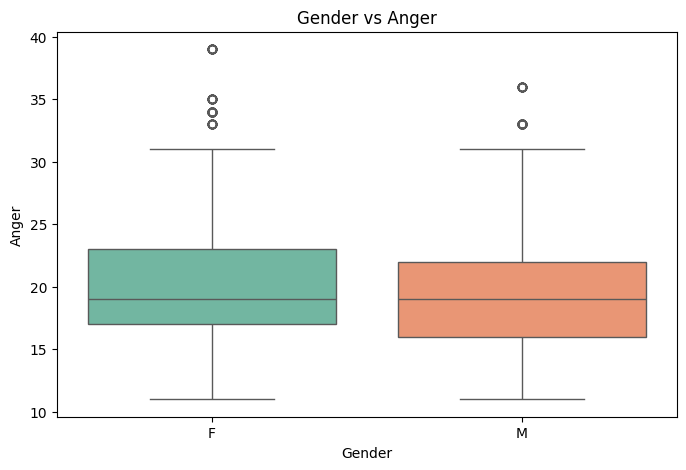

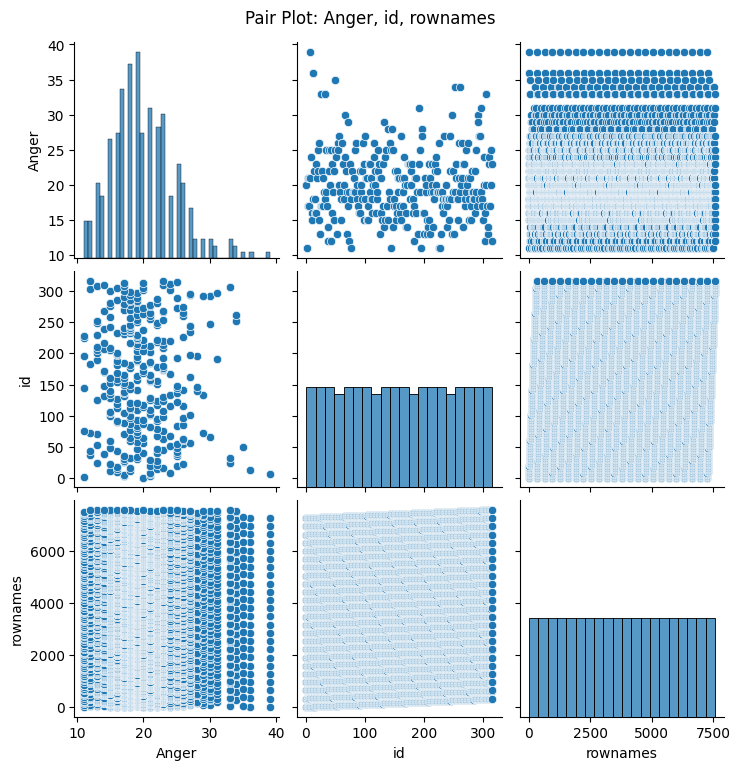

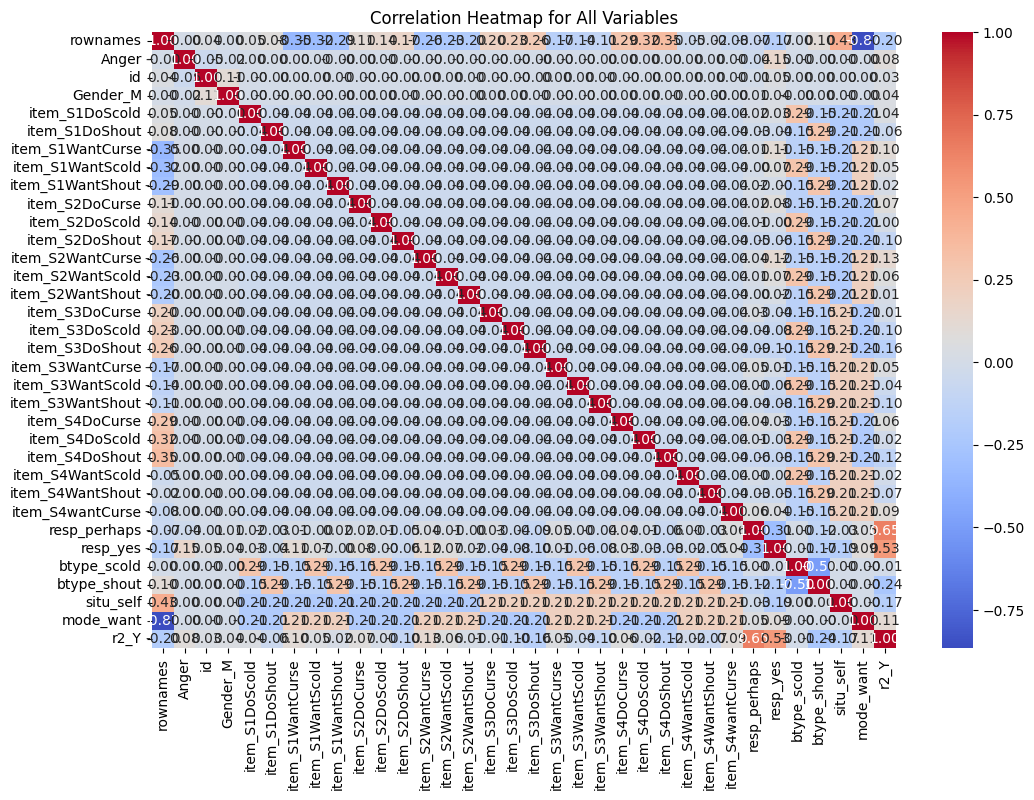

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Data Handling: Convert categorical columns to category type for efficiency
categorical_columns = ['Gender', 'item', 'resp', 'btype', 'situ', 'mode', 'r2']
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.astype('category'))

# Univariate Analysis: Plot distributions for numerical columns
# Plotting the distribution of 'Anger'
plt.figure(figsize=(8, 5))
sns.histplot(df['Anger'], kde=True, color='blue', bins=20)
plt.title('Distribution of Anger')
plt.xlabel('Anger')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of 'id'
plt.figure(figsize=(8, 5))
sns.histplot(df['id'], kde=True, color='green', bins=20)
plt.title('Distribution of id')
plt.xlabel('id')
plt.ylabel('Frequency')
plt.show()

# Plotting count plots for categorical variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Gender
sns.countplot(ax=axes[0, 0], x='Gender', data=df)
axes[0, 0].set_title('Gender Distribution')

# Response (resp)
sns.countplot(ax=axes[0, 1], x='resp', data=df)
axes[0, 1].set_title('Response Distribution')

# Behavior Type (btype)
sns.countplot(ax=axes[0, 2], x='btype', data=df)
axes[0, 2].set_title('Behavior Type Distribution')

# Situation (situ)
sns.countplot(ax=axes[1, 0], x='situ', data=df)
axes[1, 0].set_title('Situation Distribution')

# Mode
sns.countplot(ax=axes[1, 1], x='mode', data=df)
axes[1, 1].set_title('Mode Distribution')

# r2 (binary)
sns.countplot(ax=axes[1, 2], x='r2', data=df)
axes[1, 2].set_title('r2 Distribution')

plt.tight_layout()
plt.show()

# Bivariate Analysis: Plot scatter plots for numerical relationships and correlation heatmap

# Scatter plot: Anger vs id
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Anger'], y=df['id'], color='purple')
plt.title('Anger vs id')
plt.xlabel('Anger')
plt.ylabel('id')
plt.show()

# Scatter plot: Anger vs rownames
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Anger'], y=df['rownames'], color='red')
plt.title('Anger vs rownames')
plt.xlabel('Anger')
plt.ylabel('rownames')
plt.show()

# Correlation heatmap for numerical columns
correlation_matrix = df[['Anger', 'id', 'rownames']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Box plot for categorical vs numerical (Gender vs Anger)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Anger', data=df, palette='Set2')
plt.title('Gender vs Anger')
plt.xlabel('Gender')
plt.ylabel('Anger')
plt.show()

# Multivariate Analysis: Pair plot for multiple variables
sns.pairplot(df[['Anger', 'id', 'rownames']], kind='scatter')
plt.suptitle('Pair Plot: Anger, id, rownames', y=1.02)
plt.show()

# Heatmap for correlation of all numerical columns, including categorical encoding
# First, encode categorical columns to numerical
df_encoded = pd.get_dummies(df, drop_first=True)

# Compute correlation matrix for all columns
correlation_matrix_all = df_encoded.corr()

# Plot the heatmap for all variables
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap for All Variables')
plt.show()
